### Project Title: Iris Flower Classification
#### Done By: Nozipho Sithembiso Ndebele
---

<div style="text-align: center;">
<img src="https://miro.medium.com/v2/resize:fit:1200/0*KQboQDi8ywWIryIP.jpg" alt="Iris Image" width="1000"/>
</div>

---

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a>

<a href=#seven>7. Evaluation and Validation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>

<a href=#ten>10. References</a>

---
 <a id="BC"></a>
## **Background Context**

The Iris flower dataset is a classic multivariate dataset introduced by Ronald A. Fisher in 1936. It has been widely used in statistical pattern recognition and machine learning as a benchmark for classification problems. The data was originally collected by Edgar Anderson to study the morphological variation in Iris flowers of three different species.

### Purpose
The aim of this project is to build a classification model that can accurately identify the species of an Iris flower based on its sepal and petal dimensions. This provides a practical example of supervised machine learning, specifically multi-class classification.

### Significance
The Iris dataset is often used for:

- Demonstrating the application of classification algorithms (e.g., Logistic Regression, KNN, SVM, Decision Trees, Random Forest, etc.)

- Teaching exploratory data analysis (EDA) and data visualization.

- Exploring feature importance and decision boundaries in classification.

- Benchmarking new machine learning models and pipelines.

It is an ideal dataset due to its simplicity, balanced classes, and non-trivial classification challenge.


### Problem Domain
The project focuses on predicting the species of an Iris flower based on measurable characteristics. The three species—Setosa, Versicolor, and Virginica—exhibit unique patterns in petal and sepal dimensions.

We aim to build a machine learning model that can:

- Accurately classify a flower into one of the three species.

- Understand the relationship between features and the target class.

- Evaluate the performance of different classification models.

### Challenges
- Class Overlap: While Setosa is linearly separable, Versicolor and Virginica have overlapping feature spaces.

- Feature Selection: Identifying which features contribute most to model accuracy.

- Model Evaluation: Ensuring that metrics like accuracy, precision, recall, and confusion matrix are considered for multi-class classification.

- Bias and Overfitting: Avoiding overfitting with simple models on a small dataset.

### Key Questions
- Which features are most important in distinguishing Iris species?

- How well can we classify the flowers using basic machine learning models?

- Which algorithm performs best on this dataset?

- Can we visualize the decision boundaries for interpretability?

---
<a href=#one></a>
## **Importing Packages**

### Purpose
To set up the Python environment with the necessary libraries for data manipulation, visualization, and machine learning. These libraries will facilitate data preprocessing, feature extraction, model training, and evaluation.

### Details
* Pandas: For handling and analyzing data.

* NumPy: For numerical operations.

* Matplotlib/Seaborn: For data visualization to understand trends and patterns.

* scikit-learn: For building and evaluating machine learning models.

* NLTK/Spacy: For text preprocessing and natural language processing tasks.

---

In [ ]:
# Import necessary packages  

# Data manipulation and analysis  
import pandas as pd  # Pandas for data handling  
import numpy as np  # NumPy for numerical operations  

# Data visualization  
import matplotlib.pyplot as plt  # Matplotlib for static plots  
import seaborn as sns  # Seaborn for statistical visualization  
import plotly.express as px  # Plotly for interactive plots  

# Natural Language Processing  
import nltk  # Natural Language Toolkit  
from nltk.corpus import stopwords  # Stopword removal  
from nltk.tokenize import word_tokenize  # Tokenization  
import re  # Regular expressions for text cleaning  

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Configure visualization settings
sns.set(style='whitegrid')  # Set the default style for Seaborn plots
plt.rcParams['figure.figsize'] = (10, 6)  # Set default figure size for Matplotlib

# Suppress warnings
import warnings  # Import the warnings module
warnings.filterwarnings('ignore')  # Ignore all warning messages


C:\Users\nozih\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


---
<a href=#two></a>
## **Data Collection and Description**
### Purpose
Understanding the dataset structure and feature relationships is essential for performing meaningful classification and evaluation.

### Details
The dataset consists of 150 observations, with 50 samples from each of the three Iris species.

- Source: UCI Machine Learning Repository

- Format: CSV file with 150 rows and 5 columns

- Class Distribution: Balanced (50 samples per species)

### Types of Data
- `sepal_length`	Length of the sepal (in cm)
- `sepal_width`	Width of the sepal (in cm)
- `petal_length`	Length of the petal (in cm)
- `petal_width`	Width of the petal (in cm)
- `species`	Species of the flower: Setosa, Versicolor, or Virginica



---
<a href=#three></a>
## **Loading Data**
### Purpose
The purpose of this section is to load the dataset into the notebook for further manipulation and analysis. This is the first step in working with the data, and it allows us to inspect the raw data and get a sense of its structure.

### Details
In this section, we will load the dataset into a Pandas DataFrame and display the first few rows to understand what the raw data looks like. This will help in planning the next steps of data cleaning and analysis.


---

In [ ]:
# Load the dataset into a Pandas DataFrame

# The dataset is stored in a CSV file named 'IRIS.csv'
df = pd.read_csv('IRIS.csv')

In [4]:
# df is the original dataset (DataFrame), this creates a copy of it
df_copy = df.copy()

# Now 'df_copy' is an independent copy of 'df'. Changes to 'df_copy' won't affect 'df'.


In [5]:
# Display the first few rows of the dataset to get a sense of what the raw data looks like
df_copy.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# Display the number of rows and columns in the dataset to understand its size
df_copy.shape

(150, 5)

In [7]:
# Check the structure of the dataset
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


---
<a href=#four></a>
## **Data Cleaning and Filtering**
Before analyzing the data, it is crucial to clean and filter it. This process involves handling missing values, removing outliers, correcting errors, and possibly reducing the data by filtering out irrelevant features. These steps ensure that the analysis is based on accurate and reliable data.

Details
In this section, we will:

* Check for Missing Values: Identify if there are any missing values in the dataset and handle them accordingly.
* Remove Duplicates: Ensure there are no duplicate rows that could skew the analysis.
* Correct Errors: Look for and correct any obvious data entry errors.
* Filter Data: Depending on the analysis requirements, filter the data to include only relevant records.

In [8]:
# 1. Check for missing values in the dataset

def check_missing_values(df):
    """
    Check for missing values in the dataset and display the number of missing values per column.

    Parameters:
    df (pandas.DataFrame): The dataset to check for missing values.

    Returns:
    pandas.Series: A series showing the number of missing values for each column.
    """
     # Check for missing values in the dataset and display them
    print("Missing values per column:")
    missing_values = df.isnull().sum()
    print(missing_values)
    return missing_values


In [9]:
# Assuming df is your DataFrame
missing_values = check_missing_values(df_copy)


Missing values per column:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


After examining the dataset, no missing values were found across any of the columns. This ensures data completeness and eliminates the need for imputation or further cleaning related to missing data.


In [ ]:
# 2. Checks for duplicate rows

def remove_duplicates(df):
    """
    Checks for duplicate rows in the dataset and removes them if any are found.

    Args:
    df (pandas.DataFrame): The dataframe to check for duplicate rows.

    Returns:
    pandas.DataFrame: The dataframe with duplicate rows removed, if any existed.
    """
    # Check for duplicate rows
    duplicate_rows = df.duplicated().sum()
    print(f"\nNumber of duplicate rows: {duplicate_rows}")
    
    # Remove duplicates if any exist
    if duplicate_rows > 0:
        df.drop_duplicates(inplace=True)
        print(f"Duplicate rows removed. Updated dataframe has {len(df)} rows.")
    else:
        print("No duplicate rows found.")
    
    return df

In [11]:
df_copy = remove_duplicates(df_copy)


Number of duplicate rows: 3
Duplicate rows removed. Updated dataframe has 147 rows.


Upon reviewing the dataset, 3 duplicate rows were found and removed. This ensures that all records are unique, and no further action is required for data deduplication.


## **Saving the Cleaned Dataset**
### Purpose

This section outlines how to save the cleaned dataset for future use. Saving the dataset ensures that the data cleaning process does not need to be repeated and allows for consistent use in subsequent analyses.

### Details

We will save the cleaned dataset as a CSV file.

In [ ]:
# 3. Save the cleaned dataset to a new CSV file

def save_cleaned_dataset(df, filename='cleaned_IRIS.csv'):
    """
    Saves the cleaned dataframe to a CSV file.

    Args:
    df (pandas.DataFrame): The cleaned dataframe to save.
    filename (str): The name of the file to save the dataframe to (default is 'cleaned_domestic_violence.csv').

    Returns:
    None
    """
    # Save the cleaned dataset to a CSV file
    df.to_csv(filename, index=False)
    print(f"Cleaned dataset saved successfully as '{filename}'.")


In [13]:
save_cleaned_dataset(df_copy)


Cleaned dataset saved successfully as 'cleaned_IRIS.csv'.


---
<a href=#five></a>
## **Exploratory Data Analysis (EDA)**

It is the process of analyzing datasets to summarize key features, often through visualization methods. It aims to discover patterns, spot anomalies, and formulate hypotheses for deeper insights, which informs subsequent analysis.
#### Advantages

- Helps in understanding the data before modeling.
- Provides insights that guide feature selection and engineering.
- Assists in choosing appropriate modeling techniques.
- Uncovers potential data quality issues early.

`The following methods were employed to communicate our objective:`



---


1. Summary Statistics

This will show you the mean, standard deviation, min, and max values for each measurement across all species

In [14]:
# Summary statistics for numerical columns
df_copy.describe()


,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


- The petal dimensions (length and width) have greater variation across species compared to sepal measurements.

- Petal length ranges from 1.0 cm to 6.9 cm, indicating it could be a key feature for classification.

- Sepal width shows the least variability, which might limit its predictive power.

2. Target Variable Distribution

Ensures the classes are balanced — important for model training

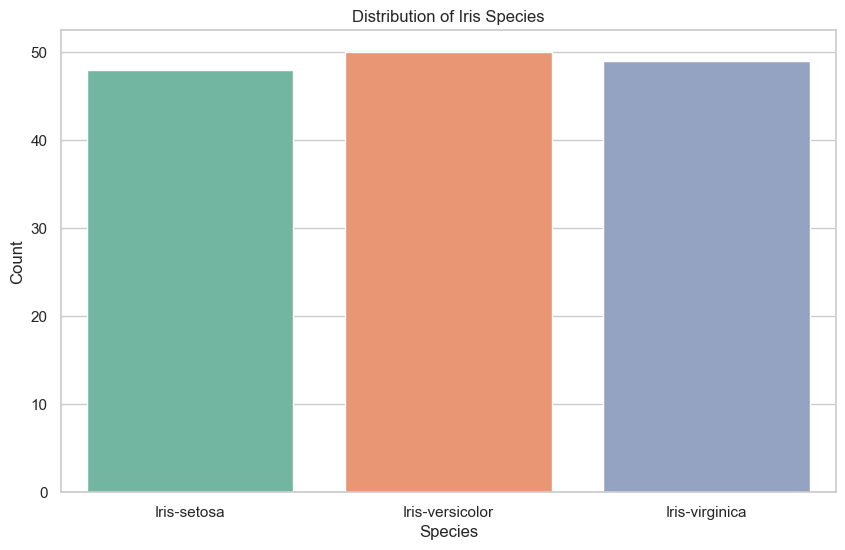

In [15]:
# Count plot for the target variable (species)
sns.countplot(x='species', data=df_copy, palette='Set2')
plt.title('Distribution of Iris Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()


- The dataset is balanced across the three classes: Setosa, Versicolor, and Virginica.

- This ensures fair training without needing resampling techniques

3. Pairplot (Multivariate Relationships)

Useful to see which features separate the species well — especially petal length and width.

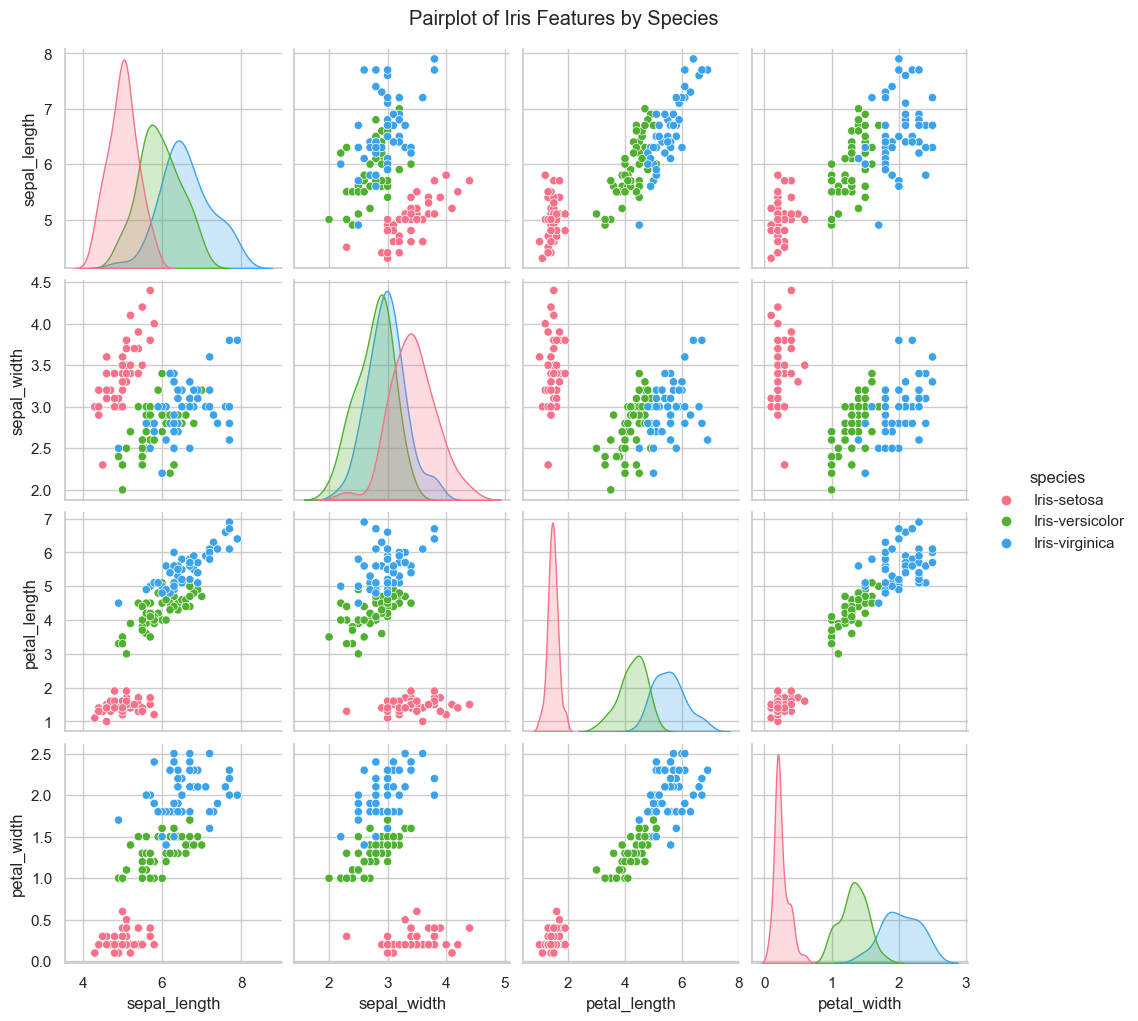

In [16]:
# Visualize relationships between features and species
sns.pairplot(df_copy, hue='species', palette='husl', diag_kind='kde')
plt.suptitle("Pairplot of Iris Features by Species", y=1.02)
plt.show()


- Setosa is clearly separable from the other two classes based on petal length and width.

- Versicolor and Virginica show some overlap, especially in sepal dimensions, but are partially separable through petal features.

- Indicates that petal_length and petal_width are highly informative for distinguishing species.

4. Correlation Matrix

Strong correlations between petal_length and petal_width — could influence feature selection or PCA later.

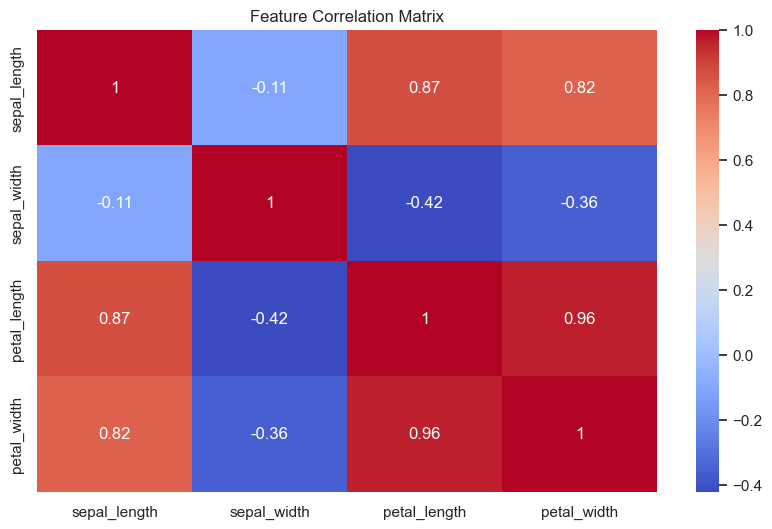

In [20]:
# Select only numeric columns
numeric_df = df_copy.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Visualize with a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()


- Strong positive correlation (0.96) between petal_length and petal_width.

- Moderate negative correlation between sepal_width and petal_length (-0.43).

- These insights are helpful for selecting or reducing features, or for dimensionality reduction techniques like PCA.

5. Boxplots by Species

Spot how each species differs across features — e.g., Setosa usually has smaller petal lengths.

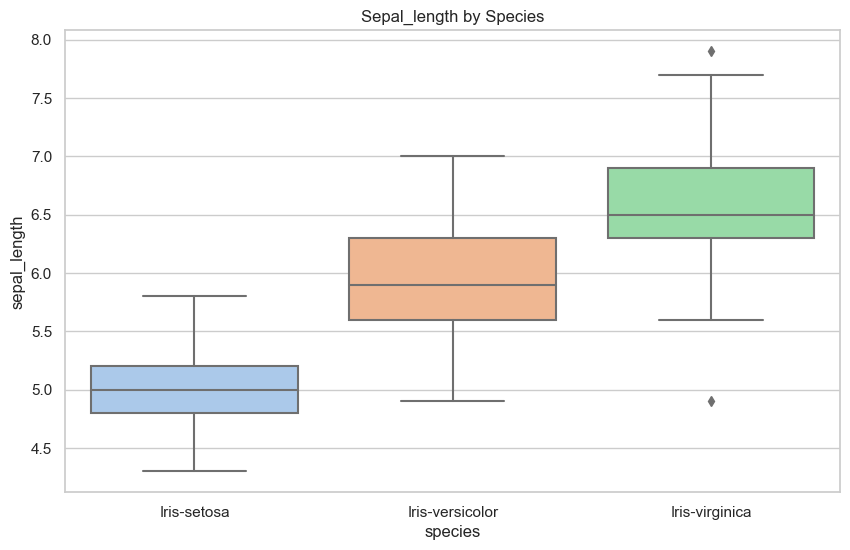

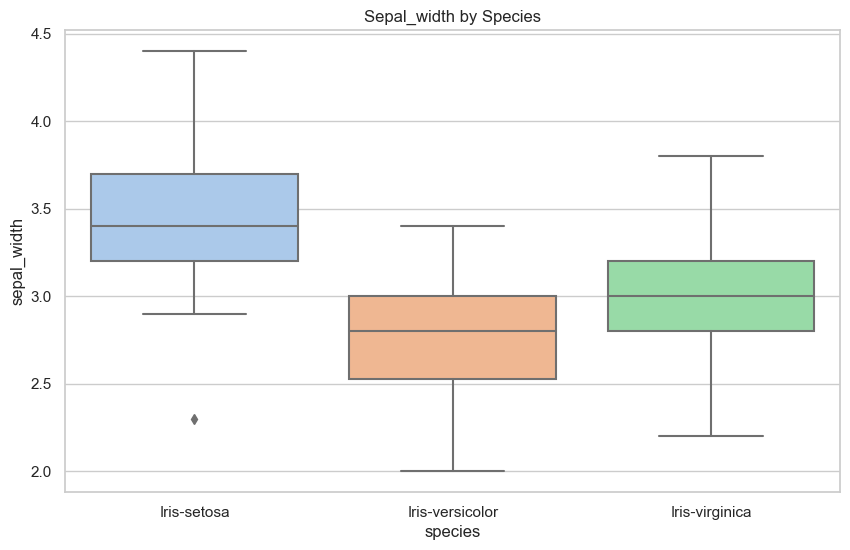

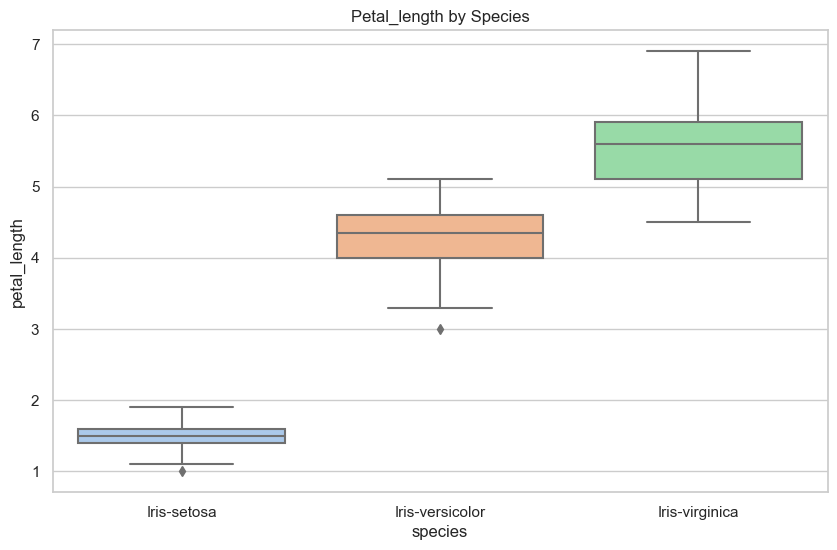

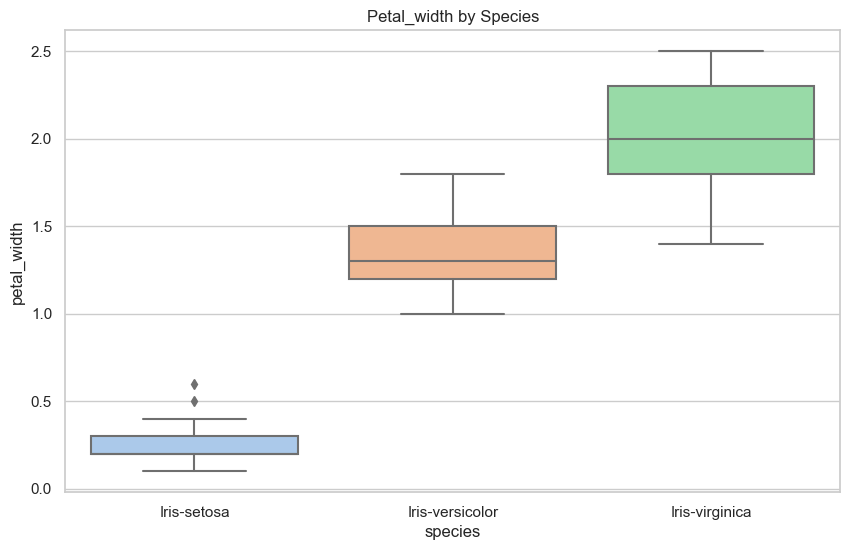

In [18]:
# Visualizing feature distribution per species
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

for feature in features:
    plt.figure()
    sns.boxplot(x='species', y=feature, data=df_copy, palette='pastel')
    plt.title(f'{feature.capitalize()} by Species')
    plt.show()


- Setosa consistently has smaller petal measurements than the other two classes.

- Virginica has larger petals, while Versicolor falls in the middle.

- Sepal features show more overlap between species but still have some differentiating power.

6. Histograms

 See skewness or outliers in individual features.

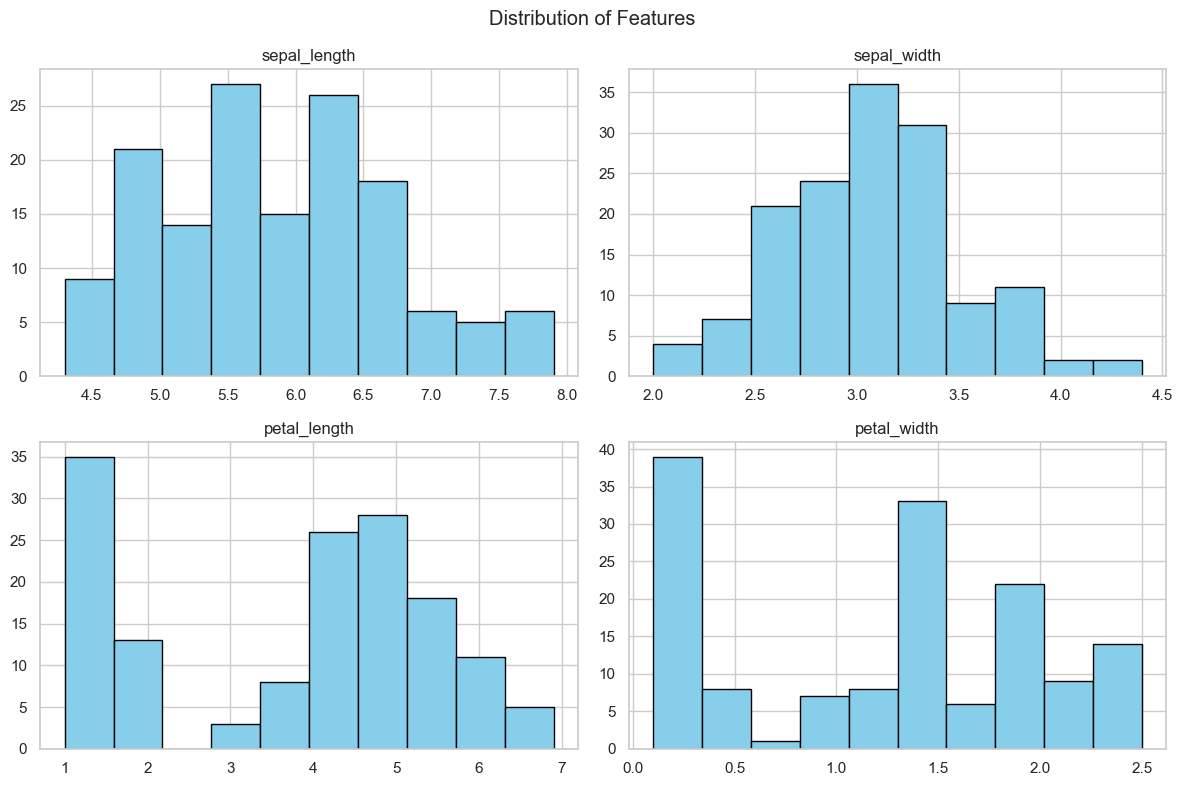

In [19]:
df_copy.hist(edgecolor='black', figsize=(12, 8), color='skyblue')
plt.suptitle("Distribution of Features")
plt.tight_layout()
plt.show()


- Features like sepal_length and petal_length show near-normal distributions.

- Petal_width is slightly skewed due to the distinct clustering of Setosa vs. the other species.

- No major outliers observed — the dataset is clean and well-behaved for modeling.

The petal_length and petal_width features are the most critical for distinguishing between species, especially Setosa. Visualization confirms that multi-class classification models (e.g., SVM, KNN, or Decision Trees) should perform well due to the clear boundaries between species in feature space.

## **Modeling**

##### Preparing the Data for Modeling
Before we can train any models, we need to split our dataset into features (X) and target variable (y), and then split them into training and testing sets.

In [21]:
# Split features and target
X = df_copy.drop('species', axis=1)  # Features
y = df_copy['species']               # Target

# Encode target labels into numeric values
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")


Training set size: (117, 4)
Testing set size: (30, 4)


We encode the species because many models require numerical input.

Stratify ensures the same proportion of classes in train/test sets.

#### Model Selection
We'll train multiple popular classification algorithms:

- Logistic Regression

- K-Nearest Neighbors (KNN)

- Support Vector Machine (SVM)

- Decision Tree

- Random Forest

## **Evaluation and Validation**

We'll evaluate using:

Accuracy

Confusion Matrix

Classification Report (precision, recall, F1-score)

1. Logistic Regression

In [ ]:
# Initialize and train
lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train, y_train)

# Predict
y_pred_lr = lr_model.predict(X_test)

# Evaluate
print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr, target_names=le.classes_))


Logistic Regression Results:
Accuracy: 0.9667

Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



2. K-Nearest Neighbors (KNN)

In [ ]:
# Initialize and train
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predict
y_pred_knn = knn_model.predict(X_test)

# Evaluate
print("K-Nearest Neighbors Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn, target_names=le.classes_))


K-Nearest Neighbors Results:
Accuracy: 1.0000

Confusion Matrix:
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



3. Support Vector Machine (SVM)

In [ ]:
# Initialize and train
svm_model = SVC(kernel='linear')  # Linear kernel for simplicity
svm_model.fit(X_train, y_train)

# Predict
y_pred_svm = svm_model.predict(X_test)

# Evaluate
print("Support Vector Machine Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm, target_names=le.classes_))


Support Vector Machine Results:
Accuracy: 1.0000

Confusion Matrix:
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



4. Decision Tree

In [ ]:
# Initialize and train
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict
y_pred_dt = dt_model.predict(X_test)

# Evaluate
print("Decision Tree Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt, target_names=le.classes_))


Decision Tree Results:
Accuracy: 0.9333

Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



5. Random Forest

In [ ]:
# Initialize and train
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate
print("Random Forest Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))


Random Forest Results:
Accuracy: 0.9667

Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



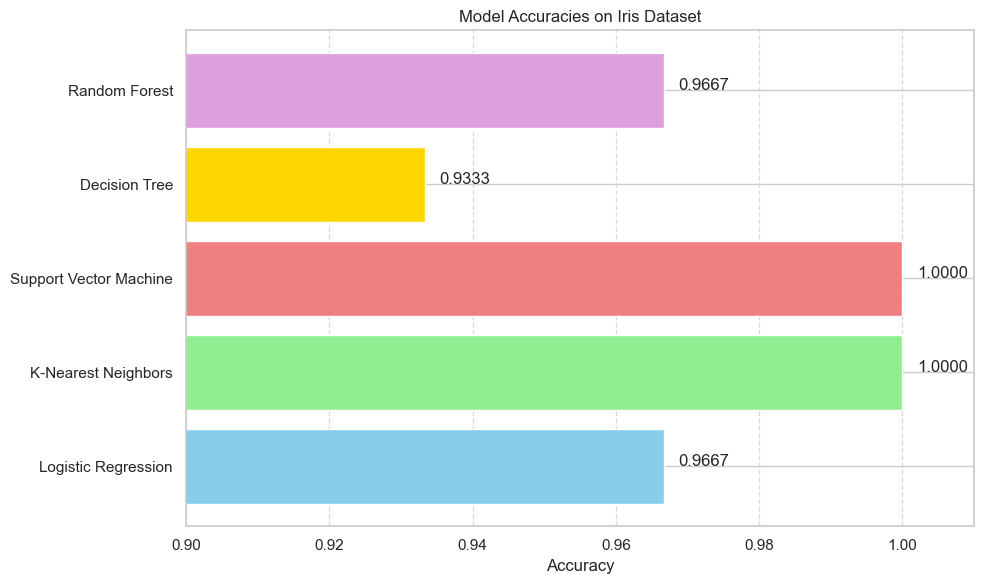

In [ ]:
# Model names and their accuracies
models = [
    "Logistic Regression",
    "K-Nearest Neighbors",
    "Support Vector Machine",
    "Decision Tree",
    "Random Forest"
]
accuracies = [0.9667, 1.0, 1.0, 0.9333, 0.9667]

# Plot
plt.figure(figsize=(10,6))
plt.barh(models, accuracies, color=["skyblue", "lightgreen", "lightcoral", "gold", "plum"])
plt.xlabel('Accuracy')
plt.title('Model Accuracies on Iris Dataset')
plt.xlim(0.9, 1.01)
plt.grid(axis='x', linestyle='--', alpha=0.7)
for index, value in enumerate(accuracies):
    plt.text(value + 0.002, index, f"{value:.4f}")
plt.tight_layout()
plt.show()


---
<a href=#nine></a>
## **Conclusion and Future Work**


##### Conclusion



##### Future Work

To build upon this study, future work could focus on the following areas:



---
<a href=#ten></a>
## **References**

## Additional Sections to Consider

**Contributors**: Nozipho Sithembiso Ndebele
